# Machine Learning Project --- Digit Recognizer

source: https://www.kaggle.com/c/digit-recognizer

In [1]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, MaxPool2D# convolution layers
from keras.layers import Activation, Dense, Dropout, Flatten # core layers

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


### Part 1 Load Data

In [2]:
digit_train = pd.read_csv('train.csv')
digit_test = pd.read_csv('test.csv')

In [3]:
digit_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
digit_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Part 2 Explanatory Data Analysis

In [6]:
#Define independent variables in the dataset
X = digit_train.drop(['label'], 1).values
#Define dependent variable
y = digit_train['label'].values

test_x = digit_test.values

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


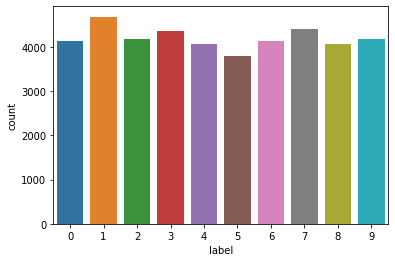

In [7]:
# Show the distribution od labels
print(digit_train['label'].value_counts())
g = sns.countplot(digit_train['label'])

#### Normalization

In [8]:
# Normalize the data
# dividing by the pixel range (in this case 255) so that all data becomes scaled between 0-1
X = X / 255.0
test_x = test_x / 255.0 

#### Reshaping

In [9]:
# Printing the shape of the Datasets
print('digit_train shape:', digit_train.shape)
print(digit_train.shape[0], 'train samples')
print(digit_test.shape[0], 'test samples')

digit_train shape: (42000, 785)
42000 train samples
28000 test samples


In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
X = X.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

#### Label encoding

In [11]:
import keras
from keras.utils import np_utils

In [12]:
# We need to one-hot encode the labels so that the labels will be 1 for the corresponding digit 
# and 0 for all others. 
y = np_utils.to_categorical(y)
print(f"Label size {y.shape}")

Label size (42000, 10)


#### Split  train and  validation sets

In [13]:
# Set the random seed
random_seed = 25

In [14]:
# Split the train and the validation set for the fitting
# divided into 80% training data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

Now we can visualize some digit images.

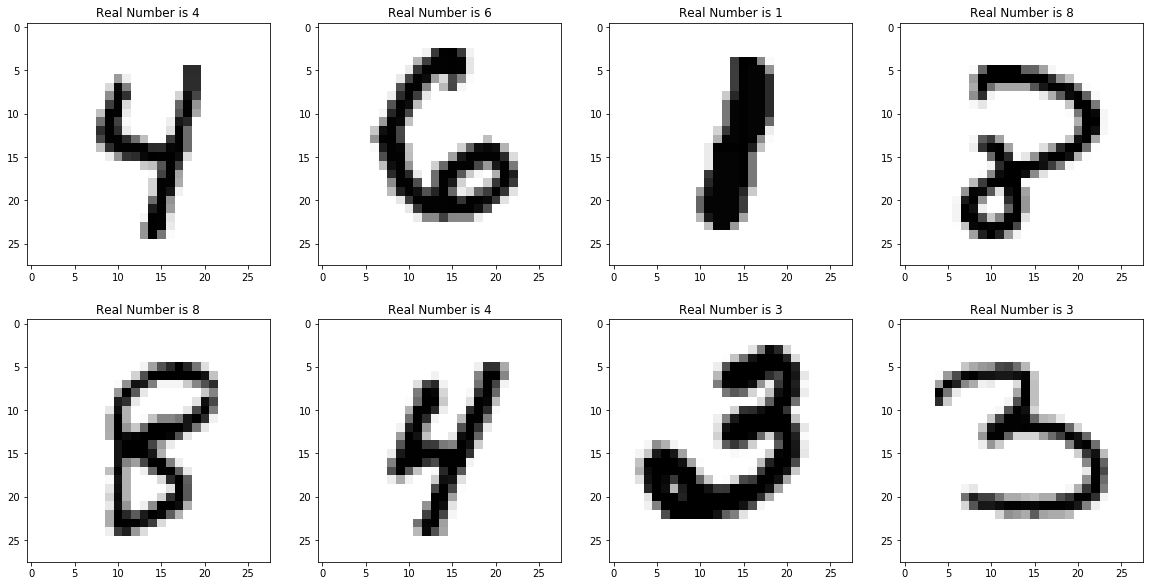

In [16]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(2, 4, figsize=(20, 10)) 
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

#### Normalization

In [17]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [18]:
epochs = 20 ##comment 可以吧epochs改成1 这样跑的快一点 确定好model 再改成20或10
batch_size = 32

### Part 3 Model Tuning

#### Define CNN Model

#### Model1 Architecture : 
 Input: 32 x 32 x 1 (1024 units)<br>
􏰀 Convolution1:f=5,m=6,s=1(28x28x6)<br>
􏰀 Pooling1:f=2,m=6,s=2(14x14x6)<br>
􏰀 Activation 1: Sigmoid<br>
􏰀 Convolution2:f=5,m=16,s=1(10x10x16)<br>
􏰀 Pooling2:f=2,m=16,s=2(5x5x16)<br>
􏰀 Activation 2: Sigmoid<br>
􏰀 Convolution3:f=5,m=120,s=1(1x1x120)<br> 􏰀 
 Activation 3: Tanh <br>
􏰀 Fully-Connected 1: 84<br>
􏰀 Output: 10

In [19]:
model=Sequential()

# Convolution and pooling 1
model.add(Conv2D(filters=6, kernel_size=(2,2), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Activation("sigmoid"))

# Convolution and pooling 2
model.add(Conv2D(filters=16, kernel_size=(5,5)))
model.add(MaxPooling2D(pool_size=2))
model.add(Activation("sigmoid"))

# Convolution 3
model.add(Conv2D(filters=120, kernel_size=(4,4)))

# Fully-Connected
model.add(Flatten())
model.add(Dense(84))
model.add(Activation("tanh"))

# Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the Model
model.compile(loss="categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

W0628 12:08:23.412116 4646680000 deprecation_wrapper.py:119] From /Users/chengao/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 12:08:23.431593 4646680000 deprecation_wrapper.py:119] From /Users/chengao/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 12:08:23.436345 4646680000 deprecation_wrapper.py:119] From /Users/chengao/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 12:08:23.462962 4646680000 deprecation_wrapper.py:119] From /Users/chengao/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0628 12:08:23.5170

In [20]:
# Train the Model
history = model.fit(X_train, y_train, 
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

W0628 12:08:23.626142 4646680000 deprecation.py:323] From /Users/chengao/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0628 12:08:23.681354 4646680000 deprecation_wrapper.py:119] From /Users/chengao/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 7s 205us/step - loss: 2.3084 - acc: 0.1076 - val_loss: 2.2925 - val_acc: 0.1057
Epoch 2/20
33600/33600 [==============================] - 7s 216us/step - loss: 2.2849 - acc: 0.1381 - val_loss: 2.2510 - val_acc: 0.1769
Epoch 3/20
33600/33600 [==============================] - 7s 220us/step - loss: 1.9932 - acc: 0.4022 - val_loss: 1.3608 - val_acc: 0.6677
Epoch 4/20
33600/33600 [==============================] - 7s 223us/step - loss: 0.8477 - acc: 0.7874 - val_loss: 0.5796 - val_acc: 0.8418
Epoch 5/20
33600/33600 [==============================] - 8s 239us/step - loss: 0.4953 - acc: 0.8577 - val_loss: 0.4429 - val_acc: 0.8714
Epoch 6/20
33600/33600 [==============================] - 8s 241us/step - loss: 0.3946 - acc: 0.8824 - val_loss: 0.3729 - val_acc: 0.8924
Epoch 7/20
33600/33600 [==============================] - 9s 266us/step - loss: 0.3389 - acc: 0.8981 - val_loss: 0.3173 - v

### model2

In [21]:
#Set the CNN model 
#CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Compile the model
model.compile(loss = "categorical_crossentropy",optimizer = "sgd", metrics=["accuracy"])

W0628 12:11:13.041491 4646680000 deprecation.py:506] From /Users/chengao/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
# With data augmentation to prevent overfitting 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

In [23]:
history2 = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)

Epoch 1/20
1050/1050 [==============================] - 145s 138ms/step - loss: 1.4246 - acc: 0.5036 - val_loss: 0.3807 - val_acc: 0.8978
Epoch 2/20
1050/1050 [==============================] - 148s 141ms/step - loss: 0.4225 - acc: 0.8676 - val_loss: 0.1734 - val_acc: 0.9468
Epoch 3/20
1050/1050 [==============================] - 145s 138ms/step - loss: 0.2742 - acc: 0.9163 - val_loss: 0.1453 - val_acc: 0.9566
Epoch 4/20
1050/1050 [==============================] - 151s 144ms/step - loss: 0.2255 - acc: 0.9323 - val_loss: 0.1169 - val_acc: 0.9645
Epoch 5/20
1050/1050 [==============================] - 143s 136ms/step - loss: 0.1989 - acc: 0.9378 - val_loss: 0.1038 - val_acc: 0.9690
Epoch 6/20
1050/1050 [==============================] - 144s 137ms/step - loss: 0.1752 - acc: 0.9468 - val_loss: 0.0893 - val_acc: 0.9743
Epoch 7/20
1050/1050 [==============================] - 141s 135ms/step - loss: 0.1579 - acc: 0.9509 - val_loss: 0.0843 - val_acc: 0.9742
Epoch 8/20
1050/1050 [============

In [24]:
##plot the model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Part 4 Model Evaluation

#### Training and validation curves

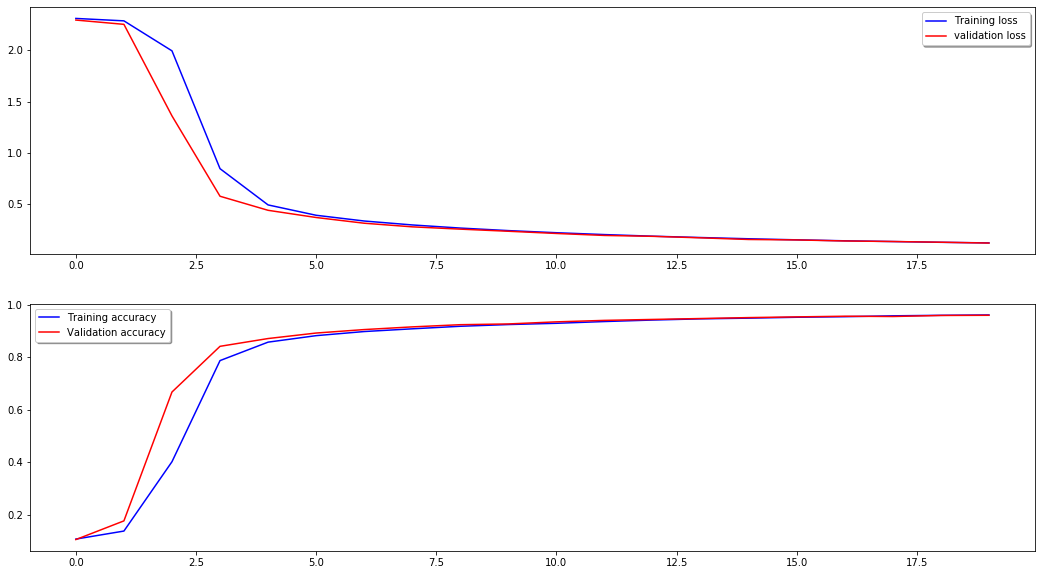

In [29]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### Confusion matrix

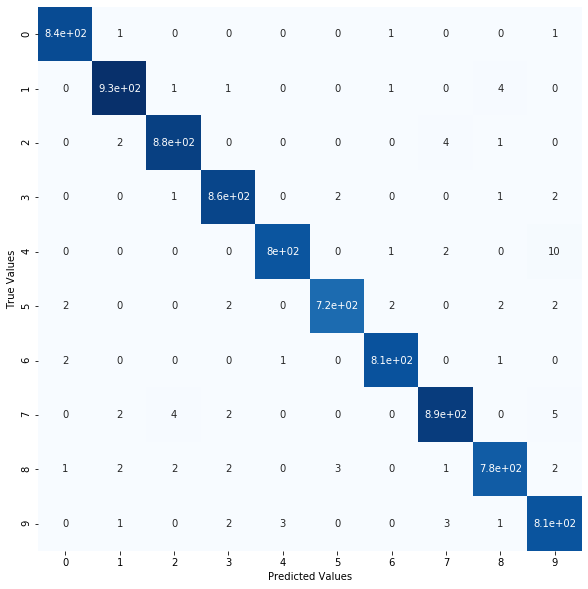

In [30]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

### Part 5 Model Prediction and submition

In [31]:
#Prediction validation results Prediction validation results

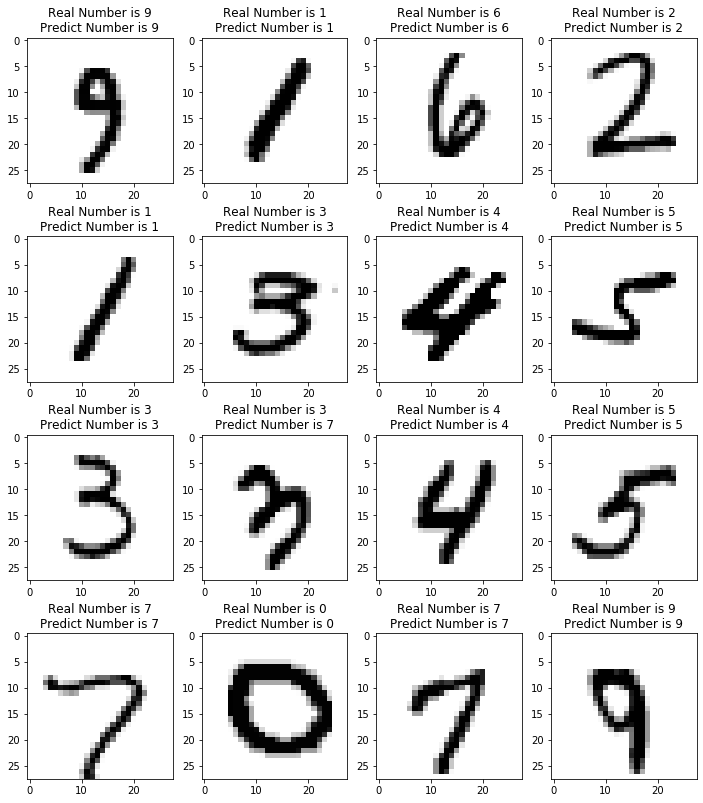

In [32]:
# Visualize some digit images with predictions.
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [34]:
pred = model.predict_classes(test_x, verbose=1)

28000/28000 [==============================] - 18s 646us/step


In [37]:
sub = pd.read_csv('sample_submission.csv')

In [38]:
sub['Label'] = pred
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [39]:
sub.to_csv("CNN_keras_sub.csv", index=False)

### Part 6 References

https://www.kaggle.com/sovitrath/mnist-cnn;<br>
https://www.kaggle.com/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1